In [1]:
import pandas as pd
import numpy as np
import cPickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scikits import bootstrap as boot
import scipy

In [2]:
# expt_id = '/190403_timepoint'
# expt_id = '/190322_timepoint'
expt_id = '/190417_timepoint'
pickle_in = open("./expt_ids"+expt_id+'.pkl',"rb")
df1 = pickle.load(pickle_in)
df1['pixel_thresh_fluor_vals_av'] = df1['pixel_thresh_fluor_vals']/df1['pixel_thresh_vol']
df1['pixel_thresh_fluor_vals_av_c2'] = df1['pixel_thresh_fluor_vals_c2']/df1['pixel_thresh_vol']
df1['nucl_cyt_fluor_ratio'] = df1['nuclear_fluor_int']/df1['cytoplasmic_fluor_int']
df1['nucl_cyt_fluor_ratio_c2'] = df1['nuclear_fluor_int_c2']/df1['cytoplasmic_fluor_int_c2']
df1['nucl_cyt_vol_ratio'] =  df1['nuclear_vol']/(df1['pixel_thresh_vol']-df1['nuclear_vol'])
df1['zproj_fluor_vals_conc'] = df1['zproj_fluor_vals']/df1['ellipse_volume']
df1['expt_id'] = expt_id

In [3]:
df1.columns

Index([u'area', u'cytoplasmic_fluor_av', u'cytoplasmic_fluor_av_c2',
       u'cytoplasmic_fluor_int', u'cytoplasmic_fluor_int_c2',
       u'ellipse_volume', u'frames', u'index_image', u'nuclear_fluor_av',
       u'nuclear_fluor_av_c2', u'nuclear_fluor_int', u'nuclear_fluor_int_c2',
       u'nuclear_vol', u'nuclear_whi5', u'pixel_thresh_fluor_vals',
       u'pixel_thresh_fluor_vals_c2', u'pixel_thresh_vol', u'zproj_fluor_vals',
       u'zproj_fluor_vals_c2', u'Strain', u'pixel_thresh_fluor_vals_av',
       u'pixel_thresh_fluor_vals_av_c2', u'nucl_cyt_fluor_ratio',
       u'nucl_cyt_fluor_ratio_c2', u'nucl_cyt_vol_ratio',
       u'zproj_fluor_vals_conc', u'expt_id'],
      dtype='object')

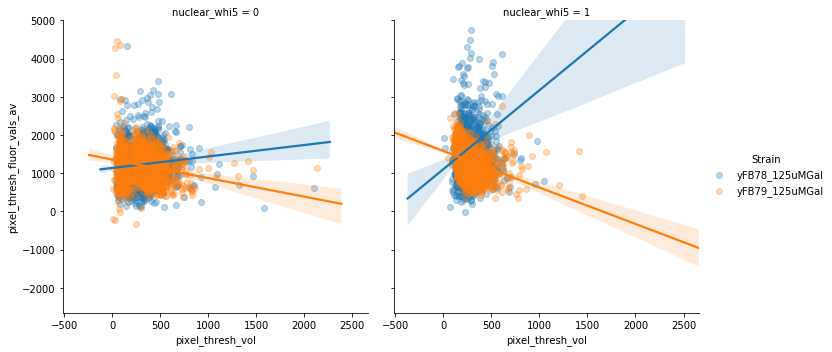

In [10]:
sns_plot = sns.lmplot(x='pixel_thresh_vol', y='pixel_thresh_fluor_vals_av', hue='Strain', data=df1, col='nuclear_whi5', scatter_kws={'alpha': 0.3})
plt.ylim(ymax=5000)
sns_plot.savefig("./tester_fig.png", dpi=500)

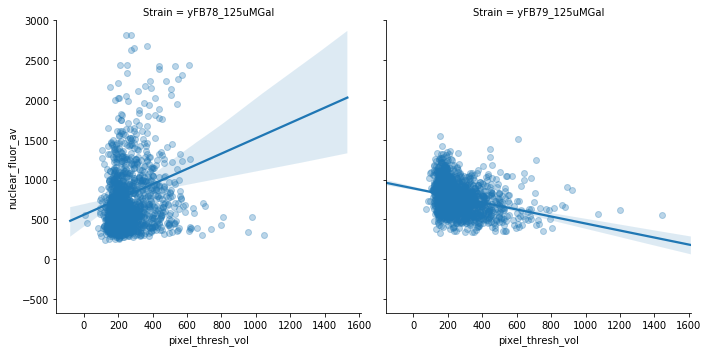

In [9]:
sns_plot = sns.lmplot(x='pixel_thresh_vol', y='nuclear_fluor_av', col='Strain', data=df1[df1['nuclear_whi5']==1], scatter_kws={'alpha': 0.3})
plt.ylim(ymax=3000)
sns_plot.savefig("./plots/timepoint_nucl_whi5_vol.png")

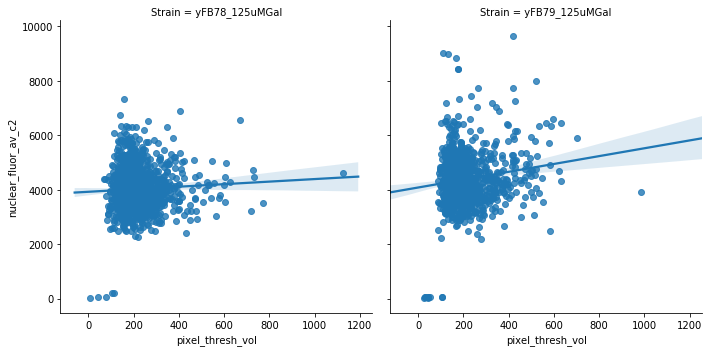

In [15]:
sns.lmplot(x='pixel_thresh_vol', y='nuclear_fluor_av_c2', col='Strain', data=df1[df1['nuclear_whi5']==1])
# plt.ylim(ymax=3000)

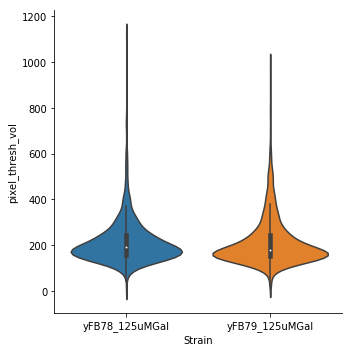

In [8]:
sns_plot=sns.catplot(x='Strain', y='pixel_thresh_vol',data=df1[df1['nuclear_whi5']==1],kind='violin')
# plt.ylim(ymax=1.0)
sns_plot.savefig('./plots/size_dist_G1_timepoint.png')

In [152]:
df2=df1[(np.abs(stats.zscore(df1.pixel_thresh_vol)) < 3)]

In [141]:
df1.columns

Index([u'area', u'cytoplasmic_fluor_av', u'cytoplasmic_fluor_av_c2',
       u'cytoplasmic_fluor_int', u'cytoplasmic_fluor_int_c2',
       u'ellipse_volume', u'frames', u'index_image', u'nuclear_fluor_av',
       u'nuclear_fluor_av_c2', u'nuclear_fluor_int', u'nuclear_fluor_int_c2',
       u'nuclear_vol', u'nuclear_whi5', u'pixel_thresh_fluor_vals',
       u'pixel_thresh_fluor_vals_c2', u'pixel_thresh_vol', u'zproj_fluor_vals',
       u'zproj_fluor_vals_c2', u'Strain', u'pixel_thresh_fluor_vals_av',
       u'pixel_thresh_fluor_vals_av_c2', u'nucl_cyt_fluor_ratio',
       u'nucl_cyt_fluor_ratio_c2', u'nucl_cyt_vol_ratio',
       u'zproj_fluor_vals_conc'],
      dtype='object')

In [154]:
df2[(df2['nuclear_whi5']==1) & (df2['Strain']=='yFB79_125uMGal')].pixel_thresh_vol.describe()

count    1047.000000
mean      208.852850
std        92.412487
min        23.903202
25%       150.255825
50%       178.001504
75%       238.982115
max       585.054565
Name: pixel_thresh_vol, dtype: float64

In [157]:
x=df1[(df1['nuclear_whi5']==1) & (df1['Strain']=='yFB78_125uMGal')].pixel_thresh_vol
np.std(x)/np.mean(x)

0.4388894864757053

(-0.0470508472416309, 1.0)

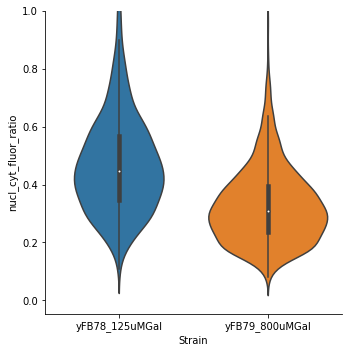

In [89]:
sns.catplot(x='Strain', y='nucl_cyt_fluor_ratio',data=df1[df1['nuclear_whi5']==1],kind='violin')
plt.ylim(ymax=1.0)

(0.0038840124910314317, 0.2)

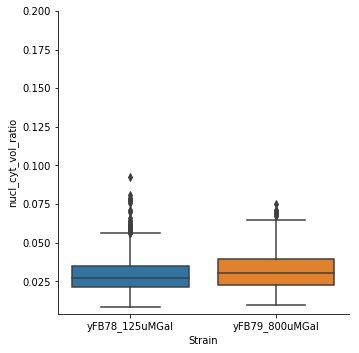

In [90]:
sns.catplot(x='Strain', y='nucl_cyt_vol_ratio',data=df1[df1['nuclear_whi5']==1], kind='box')
plt.ylim(ymax=0.2)

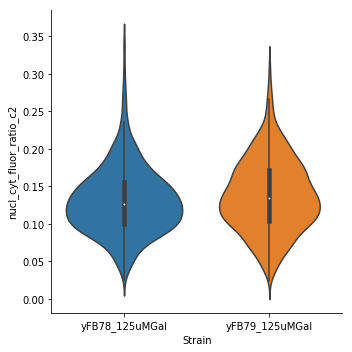

In [115]:
sns.catplot(x='Strain', y='nucl_cyt_fluor_ratio_c2',data=df1[df1['nuclear_whi5']==1],kind='violin')

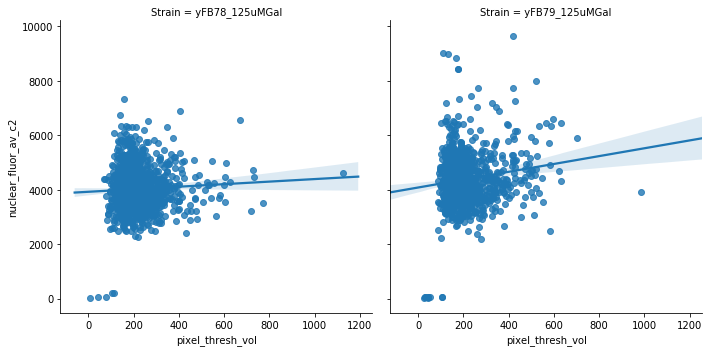

In [116]:
sns.lmplot(x='pixel_thresh_vol', y='nuclear_fluor_av_c2', col='Strain', data=df1[df1.nuclear_whi5==1])
# plt.ylim(ymax=3000)

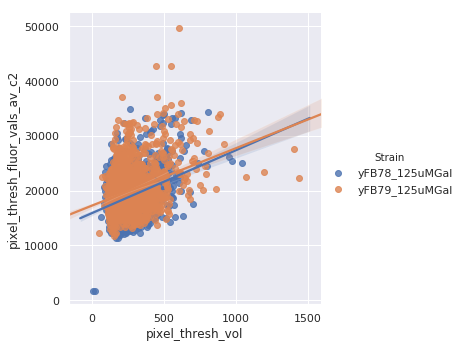

In [11]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='pixel_thresh_vol', y='pixel_thresh_fluor_vals_av_c2', hue='Strain', data=df1[df1.nuclear_whi5==1])
# plt.ylim(ymax=5000)
sns_plot.savefig('./plots/av_c2_G1_cells_timepoint.png', dpi=500)

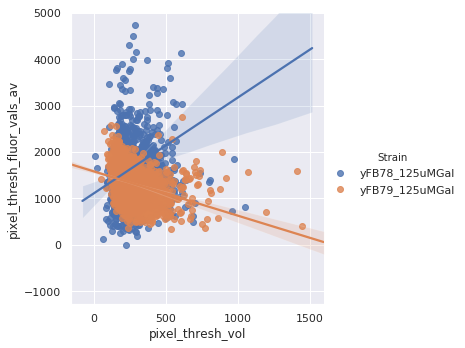

In [13]:
sns_plot=sns.lmplot(x='pixel_thresh_vol', y='pixel_thresh_fluor_vals_av', hue='Strain', data=df1[df1.nuclear_whi5==1])
plt.ylim(ymax=5000)
sns_plot.savefig('./plots/av_c1_G1_cells_timepoint.png', dpi=500)

yFB78_125uMGal pixel_thresh_fluor_vals_av
0.08247314343592005 0.19996797697694305
yFB79_125uMGal pixel_thresh_fluor_vals_av
-0.5119790908498444 -0.39999107538856316
yFB78_125uMGal pixel_thresh_fluor_vals_av_c2
0.22749741092168613 0.3508335748810121
yFB79_125uMGal pixel_thresh_fluor_vals_av_c2
0.1985486016714516 0.34412673598178417
['Whi5-mVenNB, pGAL1-WHI5', 'Whi5-mVenNB, pWHI5-WHI5', 'pACT1-mCherry, pGAL1-WHI5', 'pACT1-mCherry, pWHI5-WHI5']


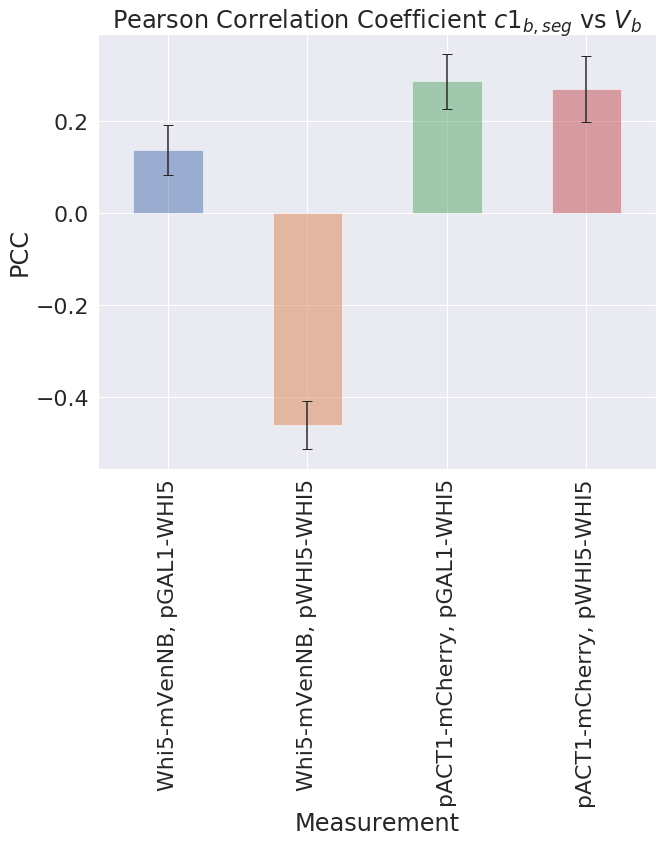

In [29]:
nucl_whi5 = 1
Strains = ['yFB78_125uMGal', 'yFB79_125uMGal']
genotype = ['pGAL1-WHI5', 'pWHI5-WHI5']
fluor = ['Whi5-mVenNB', 'pACT1-mCherry']
x = 'pixel_thresh_vol'
y=['pixel_thresh_fluor_vals_av', 'pixel_thresh_fluor_vals_av_c2']

vals = [[],[]]
label = []
for ind in range(len(y)):
    for ind1 in range(len(Strains)):
        print Strains[ind1], y[ind]
        v1=df1.Strain==Strains[ind1]
        v2=df1.nuclear_whi5 == 1
        label.append(fluor[ind]+', '+genotype[ind1])
        z = boot.ci((df1[v1 & v2][x],df1[v1 & v2][y[ind]]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df1[v1&v2][x], df1[v1&v2][y[ind]])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Pearson Correlation Coefficient $c1_{b,seg}$ vs $V_b$')
plt.xlabel('Measurement')
plt.ylabel('PCC')
fig=plot.get_figure()
fig.savefig('./plots/timepoint_pcc_comp_G1.png',bbox_inches='tight')

yFB78_125uMGal pixel_thresh_fluor_vals_av
0.00026855985832191894 0.0006903715847764485
yFB79_125uMGal pixel_thresh_fluor_vals_av
-0.0008566474261705191 -0.0006059950367658988
yFB78_125uMGal pixel_thresh_fluor_vals_av_c2
0.00048798811159465676 0.0007984959053016669
yFB79_125uMGal pixel_thresh_fluor_vals_av_c2
0.00041552858789395636 0.0007807732690598299
['Whi5-mVenNB, pGAL1-WHI5', 'Whi5-mVenNB, pWHI5-WHI5', 'pACT1-mCherry, pGAL1-WHI5', 'pACT1-mCherry, pWHI5-WHI5']


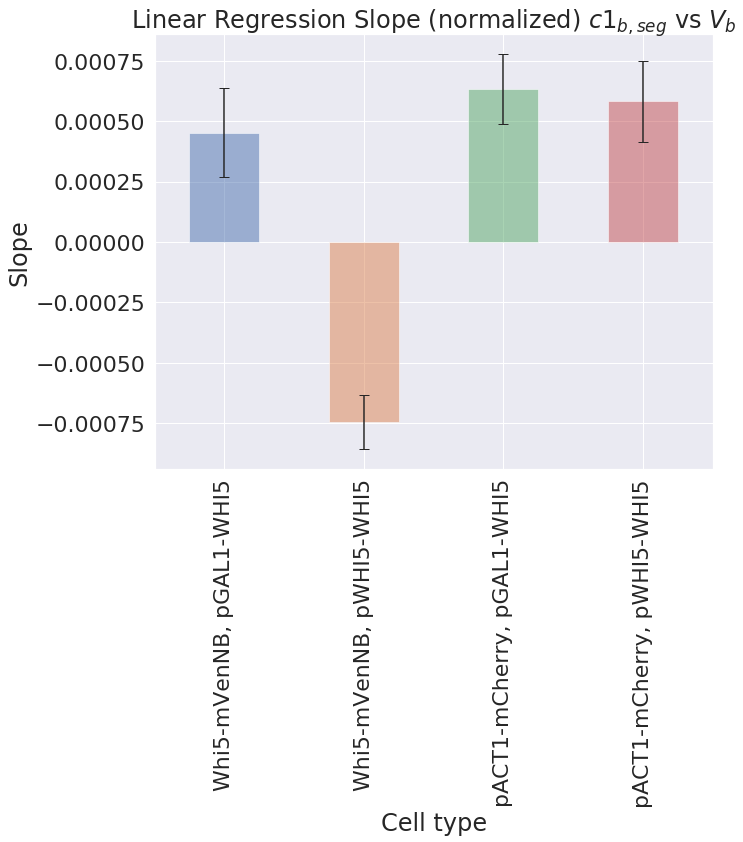

In [32]:
nucl_whi5 = 1
Strains = ['yFB78_125uMGal', 'yFB79_125uMGal']
genotype = ['pGAL1-WHI5', 'pWHI5-WHI5']
fluor = ['Whi5-mVenNB', 'pACT1-mCherry']
x = 'pixel_thresh_vol'
y=['pixel_thresh_fluor_vals_av', 'pixel_thresh_fluor_vals_av_c2']

vals = [[],[]]
label = []
for ind in range(len(y)):
    for ind1 in range(len(Strains)):
        print Strains[ind1], y[ind]
        v1=df1.Strain==Strains[ind1]
        v2=df1.nuclear_whi5 == 1
        label.append(fluor[ind]+', '+genotype[ind1])
        z = boot.ci((df1[v1 & v2][x],df1[v1 & v2][y[ind]]/np.mean(df1[v1&v2][y[ind]])), scipy.stats.linregress)
        vals[0].append(scipy.stats.linregress(df1[v1&v2][x], df1[v1&v2][y[ind]]/np.mean(df1[v1&v2][y[ind]]))[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Linear Regression Slope (normalized) $c1_{b,seg}$ vs $V_b$')
plt.xlabel('Cell type')
plt.ylabel('Slope')
fig=plot.get_figure()
fig.savefig('./plots/timepoint_slope_comp_G1.png',bbox_inches='tight')

In [50]:
df.columns

Index([u'area', u'cytoplasmic_fluor_av', u'cytoplasmic_fluor_av_c2',
       u'cytoplasmic_fluor_int', u'cytoplasmic_fluor_int_c2',
       u'ellipse_volume', u'frames', u'index_image', u'nuclear_fluor_av',
       u'nuclear_fluor_av_c2', u'nuclear_fluor_int', u'nuclear_fluor_int_c2',
       u'nuclear_vol', u'nuclear_whi5', u'pixel_thresh_fluor_vals',
       u'pixel_thresh_fluor_vals_c2', u'pixel_thresh_vol', u'zproj_fluor_vals',
       u'zproj_fluor_vals_c2', u'Strain', u'pixel_thresh_fluor_vals_av',
       u'pixel_thresh_fluor_vals_av_c2', u'nucl_cyt_fluor_ratio',
       u'nucl_cyt_fluor_ratio_c2', u'nucl_cyt_vol_ratio',
       u'zproj_fluor_vals_conc', u'expt_id'],
      dtype='object')

In [55]:
strain_tracker = {'yFB78_125uMGal':'pGAL1-WHI5','yFB79_125uMGal':'pWHI5-WHI5','yFB79_800uMGal':'pWHI5-WHI5'}

In [57]:
expt_ids = ['/190322_timepoint', '/190403_timepoint', '/190417_timepoint']

for ind in range(len(expt_ids)):
    expt_id=expt_ids[ind]
    pickle_in = open("./expt_ids"+expt_id+'.pkl',"rb")
    df1 = pickle.load(pickle_in)
    df1['pixel_thresh_fluor_vals_av'] = df1['pixel_thresh_fluor_vals']/df1['pixel_thresh_vol']
    df1['pixel_thresh_fluor_vals_av_c2'] = df1['pixel_thresh_fluor_vals_c2']/df1['pixel_thresh_vol']
    df1['nucl_cyt_fluor_ratio'] = df1['nuclear_fluor_int']/df1['cytoplasmic_fluor_int']
    df1['nucl_cyt_fluor_ratio_c2'] = df1['nuclear_fluor_int_c2']/df1['cytoplasmic_fluor_int_c2']
    df1['nucl_cyt_vol_ratio'] =  df1['nuclear_vol']/(df1['pixel_thresh_vol']-df1['nuclear_vol'])
    df1['zproj_fluor_vals_conc'] = df1['zproj_fluor_vals']/df1['ellipse_volume']
    df1['expt_id'] = expt_id
    df1['Genotype'] = [strain_tracker[obj] for obj in df1.Strain]
    if ind==0:
        df = df1.copy()
    else:
        df=df.append(df1)

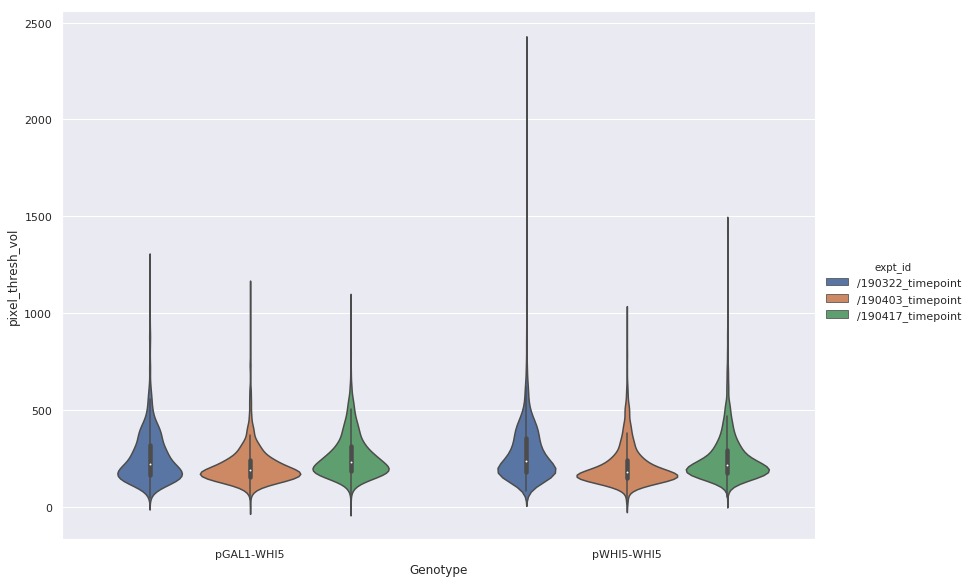

In [58]:
# fig=plt.figure(figsize=[10,5])
sns_plot=sns.catplot(x='Genotype', y='pixel_thresh_vol',data=df[df['nuclear_whi5']==1],kind='violin', hue='expt_id', height=8.27, aspect=11.7/8.27)
plt.show()

yFB78_125uMGal pixel_thresh_fluor_vals_av /190322_timepoint
0.022881678000492397 0.11341675350606802
yFB78_125uMGal pixel_thresh_fluor_vals_av /190403_timepoint
0.08215629028910935 0.20051377568042172
yFB78_125uMGal pixel_thresh_fluor_vals_av /190417_timepoint
0.08788428383719582 0.21901523789119826
yFB79_125uMGal pixel_thresh_fluor_vals_av /190322_timepoint
-0.37239038861049983 -0.2932351993056554
yFB79_125uMGal pixel_thresh_fluor_vals_av /190403_timepoint
-0.5117433142844794 -0.4020201249780175
yFB79_125uMGal pixel_thresh_fluor_vals_av /190417_timepoint
-0.37606285239749904 -0.2720593766316365
yFB78_125uMGal pixel_thresh_fluor_vals_av_c2 /190322_timepoint
0.19401005715865569 0.28539721717287586
yFB78_125uMGal pixel_thresh_fluor_vals_av_c2 /190403_timepoint
0.2279935321909513 0.34931217602560416
yFB78_125uMGal pixel_thresh_fluor_vals_av_c2 /190417_timepoint
0.29492011261164164 0.4032574398450668
yFB79_125uMGal pixel_thresh_fluor_vals_av_c2 /190322_timepoint
0.08156952996371679 0.21841

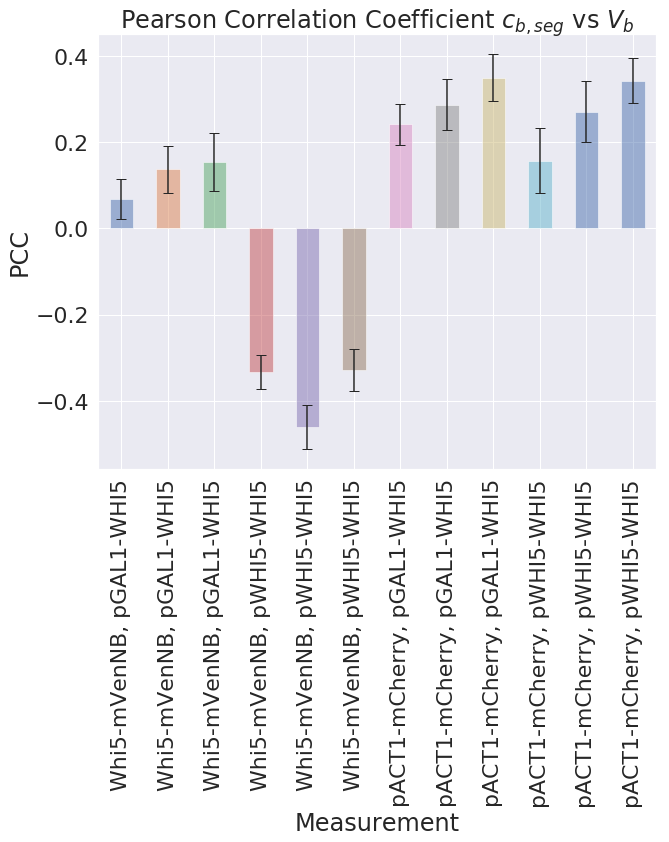

In [65]:
nucl_whi5 = 1
expt_ids = ['/190322_timepoint', '/190403_timepoint', '/190417_timepoint']
Strains = ['yFB78_125uMGal', 'yFB79_125uMGal']
genotype = ['pGAL1-WHI5', 'pWHI5-WHI5']
fluor = ['Whi5-mVenNB', 'pACT1-mCherry']
x = 'pixel_thresh_vol'
y=['pixel_thresh_fluor_vals_av', 'pixel_thresh_fluor_vals_av_c2']

vals = [[],[]]
label = []

for ind in range(len(y)):
    for ind1 in range(len(Strains)):
        for ind0 in range(len(expt_ids)):
            print Strains[ind1], y[ind], expt_ids[ind0]
            v1=df.Genotype==genotype[ind1]
            v2=df.nuclear_whi5 == 1
            v3 = df.expt_id==expt_ids[ind0]
            label.append(fluor[ind]+', '+genotype[ind1])
            z = boot.ci((df[v1 & v2&v3][x],df[v1 & v2&v3][y[ind]]), scipy.stats.pearsonr)
            vals[0].append(scipy.stats.pearsonr(df[v1&v2&v3][x], df[v1&v2&v3][y[ind]])[0])
            vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
            print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Pearson Correlation Coefficient $c_{b,seg}$ vs $V_b$')
plt.xlabel('Measurement')
plt.ylabel('PCC')
fig=plot.get_figure()
fig.savefig('./plots/timepoint_pcc_comp_G1_full.png',bbox_inches='tight')

yFB78_125uMGal pixel_thresh_fluor_vals_av /190322_timepoint
9.81095690530567e-05 0.0005073437733427304
yFB78_125uMGal pixel_thresh_fluor_vals_av /190403_timepoint
0.0002650496321429387 0.000687319529411048
yFB78_125uMGal pixel_thresh_fluor_vals_av /190417_timepoint
0.0006617662115016831 0.002067816540780723
yFB79_125uMGal pixel_thresh_fluor_vals_av /190322_timepoint
-0.00045869847539625015 -0.00031531334346637595
yFB79_125uMGal pixel_thresh_fluor_vals_av /190403_timepoint
-0.0008575499646992819 -0.0006100517229194256
yFB79_125uMGal pixel_thresh_fluor_vals_av /190417_timepoint
-0.0008456257117637558 -0.0005575655377091824
yFB78_125uMGal pixel_thresh_fluor_vals_av_c2 /190322_timepoint
0.00021942180251049466 0.0003376638232468049
yFB78_125uMGal pixel_thresh_fluor_vals_av_c2 /190403_timepoint
0.0004911967373752768 0.0007982948761473458
yFB78_125uMGal pixel_thresh_fluor_vals_av_c2 /190417_timepoint
0.0005111109300261725 0.0007144102537348697
yFB79_125uMGal pixel_thresh_fluor_vals_av_c2 /190

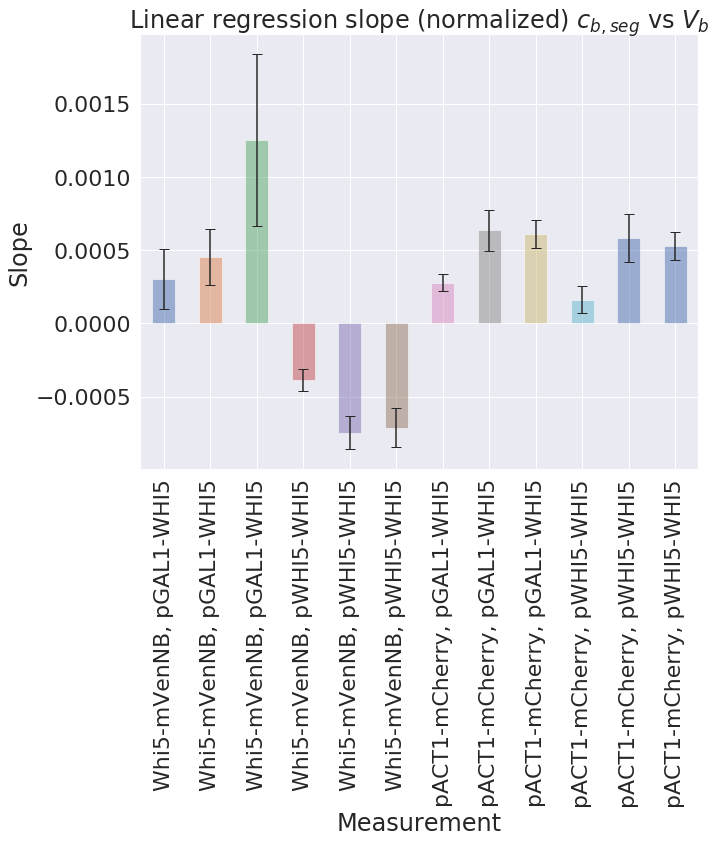

In [67]:
nucl_whi5 = 1
expt_ids = ['/190322_timepoint', '/190403_timepoint', '/190417_timepoint']
Strains = ['yFB78_125uMGal', 'yFB79_125uMGal']
genotype = ['pGAL1-WHI5', 'pWHI5-WHI5']
fluor = ['Whi5-mVenNB', 'pACT1-mCherry']
x = 'pixel_thresh_vol'
y=['pixel_thresh_fluor_vals_av', 'pixel_thresh_fluor_vals_av_c2']

vals = [[],[]]
label = []

for ind in range(len(y)):
    for ind1 in range(len(Strains)):
        for ind0 in range(len(expt_ids)):
            print Strains[ind1], y[ind], expt_ids[ind0]
            v1=df.Genotype==genotype[ind1]
            v2=df.nuclear_whi5 == 1
            v3 = df.expt_id==expt_ids[ind0]
            label.append(fluor[ind]+', '+genotype[ind1])
            z = boot.ci((df[v1 & v2&v3][x],df[v1 & v2&v3][y[ind]]/np.mean(df[v1&v2&v3][y[ind]])), scipy.stats.linregress)
            vals[0].append(scipy.stats.linregress(df[v1&v2&v3][x], df[v1&v2&v3][y[ind]]/np.mean(df[v1&v2&v3][y[ind]]))[0])
            vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
            print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Linear regression slope (normalized) $c_{b,seg}$ vs $V_b$')
plt.xlabel('Measurement')
plt.ylabel('Slope')
fig=plot.get_figure()
fig.savefig('./plots/timepoint_slope_comp_G1_full.png',bbox_inches='tight')

In [63]:
df[df.expt_id=='/190322_timepoint'].Genotype.unique()

array(['pGAL1-WHI5', 'pWHI5-WHI5'], dtype=object)